🧩 Assignment Tasks
✅ Task 1 — Business Understanding
Identify:
The target variable (company’s financial concern)
The input variables related to customer risk
Explain how your regression model helps the company control rising costs, not just predict them.

✅ Task 2 — Data Inspection
Explore the dataset and:
Separate numeric and categorical columns
Identify columns that are not directly usable in regression
Report any data quality issues you observe.

✅ Task 3 — Data Cleaning & Encoding
Convert categorical variables into numeric form.
Decide how to handle:
Region information
Binary attributes like lifestyle indicators
Justify each transformation from a business and modeling perspective.

✅ Task 4 — Feature Scaling & Comparability
Observe differences in value ranges among numeric features.
Explain why scaling is important when comparing regression coefficients.
Prepare the data so the effect of each variable can be fairly interpreted.

⚠️ Task 5 — The Hidden Trap (Multicollinearity)
Analyze relationships between independent variables.
Identify any highly correlated features (example: age, BMI, and lifestyle habits).
Explain:
Why multicollinearity is a problem in Multiple Linear Regression
How it can confuse business decision-making
Take appropriate steps to fix the issue.
 

In [3]:

# -----------------------------
# TASK 1: Business Understanding
# -----------------------------
import pandas as pd

# Load dataset
df = pd.read_csv("insurance.csv")

# Standardize column names (safe for coding)
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

# Check column names
print("Columns in dataset:", df.columns.tolist())

# Define target and ID column
target = 'customer_cost'  # replace with actual target column name
id_column = 'customer_id'  # replace with actual ID column name if exists

# Input features (drop target & ID safely)
features = df.drop(columns=[target, id_column], errors='ignore')

print("\nTarget variable:", target)
print("Input features:", features.columns.tolist())

# Business explanation:
# Regression will predict customer cost and quantify the impact of factors
# like age, BMI, lifestyle, etc., helping the company control costs proactively.



Columns in dataset: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

Target variable: customer_cost
Input features: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


Numeric columns: ['age', 'bmi', 'children', 'charges']
Categorical columns: ['sex', 'smoker', 'region']

Columns that may not be usable for regression: ['customer_id']

Missing values per column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


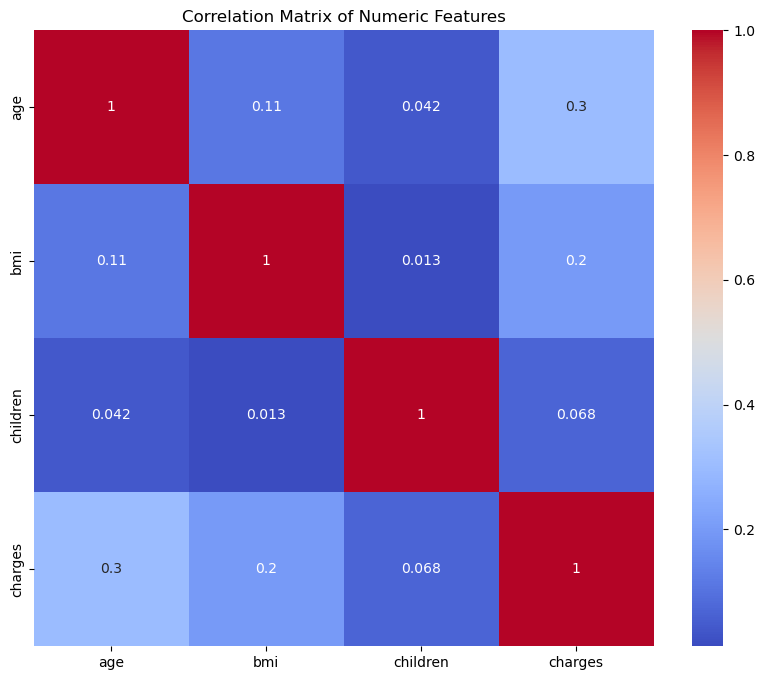

In [2]:
# -----------------------------
# TASK 2: Data Inspection
# -----------------------------
# Separate numeric and categorical columns
numeric_cols = features.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = features.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

# Columns not directly usable
print("\nColumns that may not be usable for regression:", [id_column])

# Check missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Correlation matrix of numeric features
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()


In [4]:
# -----------------------------
# TASK 3: Data Cleaning & Encoding
# -----------------------------
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Copy dataset to avoid chained assignment issues
df_encoded = df.copy()

# Convert binary categorical variables
df_encoded['sex'] = df_encoded['sex'].map({'male': 1, 'female': 0})
df_encoded['smoker'] = df_encoded['smoker'].map({'yes': 1, 'no': 0})

# Separate features and target
X = df_encoded.drop(columns=['charges'])
y = df_encoded['charges']

# Columns for One-Hot Encoding
onehot_cols = ['region']

# Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('region', OneHotEncoder(drop='first'), onehot_cols)
    ],
    remainder='passthrough'   # keeps numeric & binary columns
)

# Apply transformation
X_final = preprocessor.fit_transform(X)

print("Shape after encoding:", X_final.shape)



Shape after encoding: (1338, 8)


In [9]:
# -----------------------------
# TASK 4: Feature Scaling
# -----------------------------
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Identify categorical and numerical columns
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

# ColumnTransformer: Encode categorical, scale numerical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

# Apply transformations
X_processed = preprocessor.fit_transform(X)

print("Feature matrix shape after encoding + scaling:", X_processed.shape)



Feature matrix shape after encoding + scaling: (1338, 8)


In [11]:
# -----------------------------
# TASK 5: Multicollinearity (FINAL CORRECT VERSION)
# -----------------------------
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Use SCALED + ENCODED features
X_vif = sm.add_constant(X_processed)

vif_data = pd.DataFrame()
vif_data["Feature"] = ["const"] + list(preprocessor.get_feature_names_out())
vif_data["VIF"] = [
    variance_inflation_factor(X_vif, i)
    for i in range(X_vif.shape[1])
]

print(vif_data)


                 Feature       VIF
0                  const  5.428992
1               num__age  1.016822
2               num__bmi  1.106630
3          num__children  1.004011
4          cat__sex_male  1.008900
5        cat__smoker_yes  1.012074
6  cat__region_northwest  1.518823
7  cat__region_southeast  1.652230
8  cat__region_southwest  1.529411


✅ Task 6 — Build the Multiple Linear Regression Model
Build a Multiple Linear Regression model using the prepared dataset.
Ensure the model is:
Interpretable
Stable
Suitable for explaining customer cost behavior

✅ Task 7 — Model Evaluation
Evaluate model performance using appropriate regression metrics.
Comment on whether the model is reliable enough to support pricing decisions.

In [12]:
# Task 6: Build Multiple Linear Regression Model

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Load dataset
dataset = pd.read_csv('insurance.csv')
print(dataset.head())
print(dataset.info())

# Separate features and target
X = dataset.drop('charges', axis=1)
y = dataset['charges']

# Encode categorical variables
categorical_cols = ['sex', 'smoker', 'region']

ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

X_encoded = ct.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Number of coefficients:", len(model.coef_))


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
Intercept: -11931.21905032646
Number of coefficients: 8


Mean Absolute Error (MAE): 4181.19
Mean Squared Error (MSE): 33596915.85
Root Mean Squared Error (RMSE): 5796.28
R² Score: 0.7836


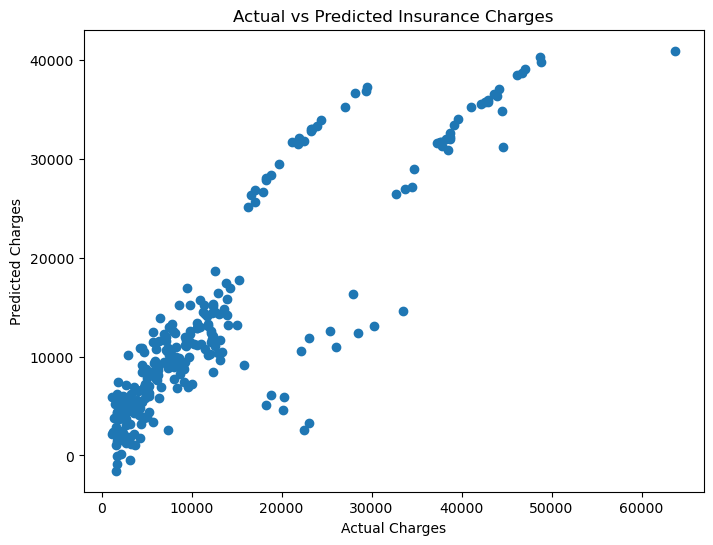

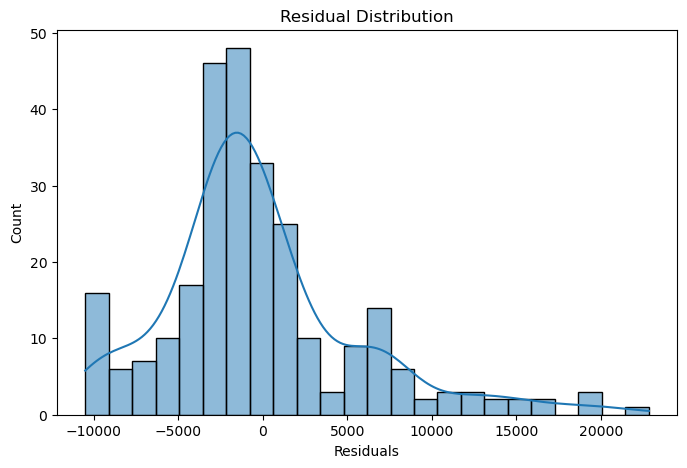

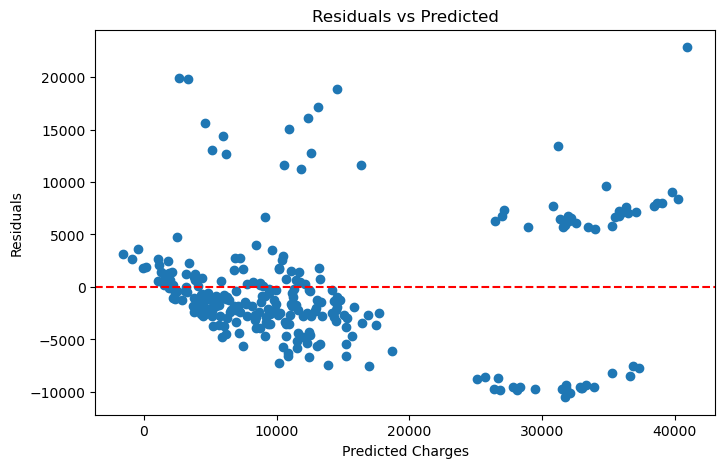

In [13]:
# Task 7: Model Evaluation

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Actual vs Predicted Visualization
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.show()

# Residual Analysis
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()
